# **PyTorch Neural Network Classification**

**Types Of Classification:**
 - **Binary Classification**
 - **Multi-Class Classification**
 - **Multi-Label Classification**

**Topics to Cover:**
 - **Architecture of a Classification Neural Network**
 - **Classification Data**
 - **Building Classification Model**
 - **Fitting the Model**
 - **Making Predictions & Evaluation**
 - **Improving the Model**
 - **Non-Linearity**
 - **Replicating Non-Linear Functions**

## **Device Agnostic Setting**

In [ ]:
# Imports
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


## **Architecture of a Classification Neural Network**

**Component of Model:**
 - **Input Layer**
 - **Hidden Layer(s)**
 - **Neurons per Hidden Layer**
 - **Output Layer Shape**
 - **Hidden Layer Activation**
 - **Output Activation**
 - **Loss Function**
 - **Optimizer**

## **Generate Classification Data**

In [ ]:
# Import from sklearn to generate classification data
from sklearn.datasets import make_classification

# Initialize the required number of samples
n_samples = 20_000

# Generate the data
X, y = make_classification(n_samples = n_samples,
                           n_features = 2,
                           n_classes = 2,
                           n_clusters_per_class = 1,
                           n_informative = 2,
                           n_redundant = 0,
                           class_sep = 2,
                           shift = 0.03,
                           random_state = 42)

In [ ]:
# First 5 features
print(f"First 5 Features:\n{X[:5]}")

# First 5 labels
print(f"\nFirst 5 Labels:\n{y[:5]}")

First 5 Features:
[[-2.04048097  1.73121704]
 [ 2.39796145  1.94240622]
 [ 1.76318056  1.15384073]
 [-2.59676926  3.53139886]
 [-1.75785509  2.2454972 ]]

First 5 Labels:
[0 1 1 0 0]


In [ ]:
# Import pandas and numpy
import pandas as pd
import numpy as np

# Add the data into pandas dataframe
df = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "y": y
})

# View the head data
df.head()

,X1,X2,y
0,-2.040481,1.731217,0
1,2.397961,1.942406,1
2,1.763181,1.153841,1
3,-2.596769,3.531399,0
4,-1.757855,2.245497,0


In [ ]:
# Value count the target
df["y"].value_counts()

0    10001
1     9999
Name: y, dtype: int64

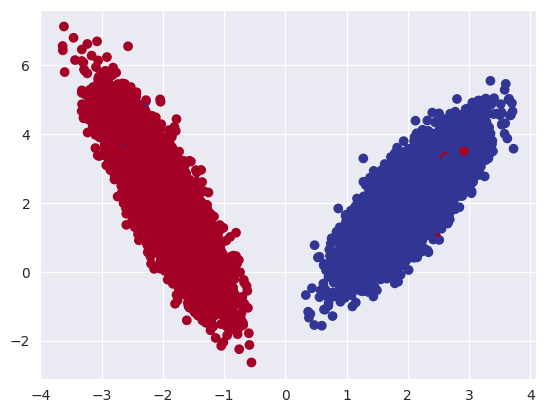

In [ ]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Plot the classification data
plt.scatter(
    x = df["X1"],
    y = df["X2"],
    c = df["y"],
    cmap = plt.cm.RdYlBu
)
plt.show()

### **Input and Output Shapes**

In [ ]:
# Check the shapes of out features and labels
X.shape, y.shape

((20000, 2), (20000,))

### **Train Test Split**

In [ ]:
# Import train_test_split() from sklearn
from sklearn.model_selection import train_test_split

# Make training and testing data from the complete data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size = 0.8, shuffle = True, random_state = 42
)

# Print the shape of the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape#

((16000, 2), (4000, 2), (16000,), (4000,))

In [ ]:
# Convert data to tensor
X_train = torch.from_numpy(X_train).type(torch.float32)
y_train = torch.from_numpy(y_train).type(torch.float32)

X_test = torch.from_numpy(X_test).type(torch.float32)
y_test = torch.from_numpy(y_test).type(torch.float32)

In [ ]:
# View the first five samples
X[:5], y[:5]

(array([[-2.04048097,  1.73121704],
        [ 2.39796145,  1.94240622],
        [ 1.76318056,  1.15384073],
        [-2.59676926,  3.53139886],
        [-1.75785509,  2.2454972 ]]),
 array([0, 1, 1, 0, 0]))

## **Building Classification Model**

In [ ]:
# PyTorch import for neural networks
from torch import nn

In [ ]:
# Construct the classification model
class SimpleBinaryClassification(nn.Module):
    def __init__(self):
        super().__init__()

        # Add layers to our neural network
        self.layer_1 = nn.Linear(in_features = 2, out_features = 5)
        self.layer_2 = nn.Linear(in_features = 5, out_features = 1)

    # forward() method computation
    def forward(self, x):
        # Return the output from the last layer
        ## 1. Data passed as input to layer_1
        ## 2. layer_1 outputs passed as input to layer_2
        ## 3. Return the output
        return self.layer_2(self.layer_1(x))

In [ ]:
# Move the model to device
sbc_model = SimpleBinaryClassification().to(device)

### **Setup Loss Function, Optimizer and Performance Metrics**

In [ ]:
# Loss function
loss_fn = nn.BCEWithLogitsLoss() # This loss function has built-in sigmoid layer

# Optimizer
optimizer = torch.optim.SGD(params = sbc_model.parameters(), lr = 1e-1)

In [ ]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
    # Get the count of correct predictions
    correct_count = torch.eq(y_true, y_pred).sum().item()

    # Calculate the accuracy
    acc = (correct_count / len(y_pred)) * 100

    # Return the accuracy
    return acc

## **Train Model**

### **Move Data to Device**

In [ ]:
# Move the data to device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

### **Before Training**

In [ ]:
# View output of forward pass on the test data (Before training)
y_logits = sbc_model(X_test)
y_logits[:5]

tensor([[-0.3444],
        [-0.3895],
        [-0.3247],
        [-0.3805],
        [-0.4765]], device='cuda:0', grad_fn=<SliceBackward0>)

In [ ]:
# Use sigmoid to model logits (Probability)
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.4148],
        [0.4038],
        [0.4195],
        [0.4060],
        [0.3831]], device='cuda:0', grad_fn=<SliceBackward0>)

In [ ]:
# Round the propabilities
y_preds = torch.round(y_pred_probs)
y_preds[:5]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<SliceBackward0>)

In [ ]:
# All above code in one line
y_pred_labels = torch.round(torch.sigmoid(sbc_model(X_test.to(device))))
y_pred_labels[:5]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<SliceBackward0>)

In [ ]:
# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
print(y_preds.squeeze())

tensor([True, True, True,  ..., True, True, True], device='cuda:0')
tensor([0., 0., 0.,  ..., 1., 0., 0.], device='cuda:0',
       grad_fn=<SqueezeBackward0>)


### **Training and Testing Loops**

In [ ]:
# Import accuracy score
from sklearn.metrics import accuracy_score

# Set manual seed for reproducible outputs
torch.manual_seed(42)

# Set the number of epochs
epochs = 1_000

# Setup empty lists to track model progress
train_loss_values = []
test_loss_values = []
epoch_count = []

# Building the training and testing loop
for epoch in range(epochs):
    # Set the model in training mode
    sbc_model.train()

    # Forward pass - Get the predictions
    y_train_logits = sbc_model(X_train).squeeze()
    y_train_pred = torch.round(torch.sigmoid(y_train_logits))

    # Calculate the loss and accuracy
    train_loss = loss_fn(y_train_logits, y_train)
    train_accuracy = accuracy_fn(y_train, y_train_pred)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Backpropogation
    train_loss.backward()

    # Update the optimizer
    optimizer.step()

    # Set the model into testing mode
    sbc_model.eval()

    # Enable the inference mode for faster predictions
    with torch.inference_mode():
        # Forward pass - Get the predictions
        y_test_logits = sbc_model(X_test).squeeze()
        y_test_pred = torch.round(torch.sigmoid(y_test_logits))

        # Calculate the loss and accuracy
        test_loss = loss_fn(y_test_logits, y_test)
        test_accuracy = accuracy_fn(y_test, y_test_pred)

    # For every epochs track the progress
    if epoch % (epochs // 10) == 0:
        ## Update the lists
        epoch_count.append(epoch)
        train_loss_values.append(train_loss.detach().to("cpu").numpy())
        test_loss_values.append(test_loss.detach().to("cpu").numpy())

        ## Print the progress
        print(f"Epoch: {epoch}\t| Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.4f} | Test Loss: {test_loss:.4f} | Test Accuracy: {test_accuracy:.4f}")

Epoch: 0	| Train Loss: 0.7643 | Train Accuracy: 43.3563 | Test Loss: 0.6937 | Test Accuracy: 48.9750
Epoch: 100	| Train Loss: 0.0420 | Train Accuracy: 99.4562 | Test Loss: 0.0358 | Test Accuracy: 99.6000
Epoch: 200	| Train Loss: 0.0397 | Train Accuracy: 99.4562 | Test Loss: 0.0328 | Test Accuracy: 99.6000
Epoch: 300	| Train Loss: 0.0395 | Train Accuracy: 99.4562 | Test Loss: 0.0324 | Test Accuracy: 99.6000
Epoch: 400	| Train Loss: 0.0395 | Train Accuracy: 99.4562 | Test Loss: 0.0323 | Test Accuracy: 99.6000
Epoch: 500	| Train Loss: 0.0395 | Train Accuracy: 99.4562 | Test Loss: 0.0322 | Test Accuracy: 99.6000
Epoch: 600	| Train Loss: 0.0395 | Train Accuracy: 99.4562 | Test Loss: 0.0322 | Test Accuracy: 99.6000
Epoch: 700	| Train Loss: 0.0395 | Train Accuracy: 99.4562 | Test Loss: 0.0322 | Test Accuracy: 99.6000
Epoch: 800	| Train Loss: 0.0395 | Train Accuracy: 99.4562 | Test Loss: 0.0322 | Test Accuracy: 99.6000
Epoch: 900	| Train Loss: 0.0395 | Train Accuracy: 99.4562 | Test Loss: 0.03

### **Plot Loss Curves**

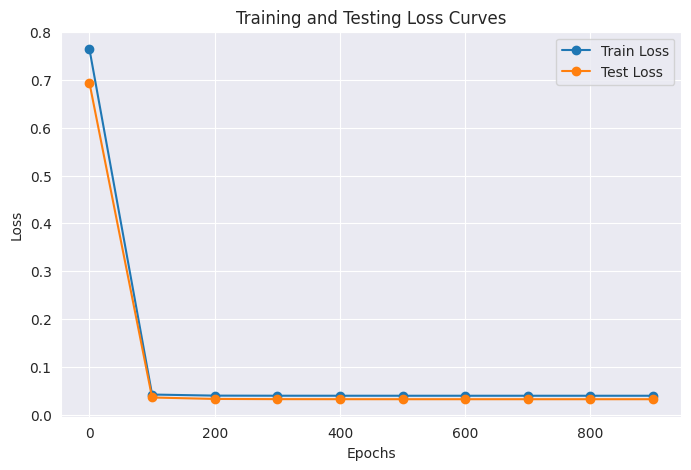

In [ ]:
# Plot loss curves
plt.figure(figsize = (8, 5))
plt.plot(epoch_count, train_loss_values, label = "Train Loss", marker = "o")
plt.plot(epoch_count, test_loss_values, label = "Test Loss", marker = "o")
plt.title("Training and Testing Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

## **Making Predictions**

### **Download File and Load Helper Functions**

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

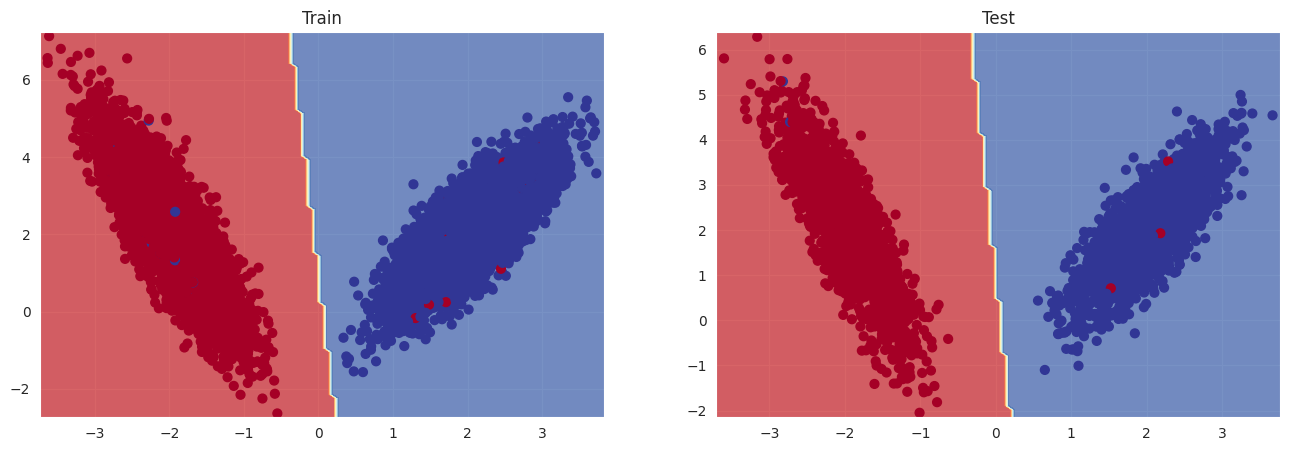

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(sbc_model, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(sbc_model, X_test, y_test)

plt.show()

### **Plot Classification Report**

In [ ]:
# Import classification report from sklearn
from sklearn.metrics import classification_report

# Use the inference mode
with torch.inference_mode():
    # Get the outputs
    y_test_pred = torch.round(torch.sigmoid(sbc_model.to(device)(X_test)))

    # Print the classification report
    print(classification_report(y_test.to("cpu"), y_test_pred.to("cpu")))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1959
         1.0       1.00      1.00      1.00      2041

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



### **Save Model**

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount("./Drive", force_remount = True)

Mounted at ./Drive


In [ ]:
# Create models directory
MODEL_PATH = Path("./Drive/MyDrive/PyTorch Course/models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# Create model save path
MODEL_NAME = "02_pytorch_simple_binary_classification.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving Model to: {MODEL_SAVE_PATH}")
torch.save(obj = sbc_model.state_dict(), f = MODEL_SAVE_PATH)

Saving Model to: Drive/MyDrive/PyTorch Course/models/02_pytorch_simple_binary_classification.pth


In [ ]:
# Check the saved file path
!ls -l "./Drive/MyDrive/PyTorch Course/models/02_pytorch_simple_binary_classification.pth"

-rw------- 1 root root 2015 Jul 18 13:25 './Drive/MyDrive/PyTorch Course/models/02_pytorch_simple_binary_classification.pth'


## **Loading a Model**

### **Initialize Model**

In [ ]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_sbc_model = SimpleBinaryClassification().to(device)

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_sbc_model.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

### **Generate Outputs**

In [ ]:
# Put the loaded model into evaluation mode
loaded_sbc_model.eval()

# Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_y_test_pred = torch.round(torch.sigmoid(loaded_sbc_model(X_test)))

### **Print Classification Report**

In [ ]:
# Print the classification report
print(classification_report(y_test.to("cpu"), loaded_model_y_test_pred.to("cpu")))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1959
         1.0       1.00      1.00      1.00      2041

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

